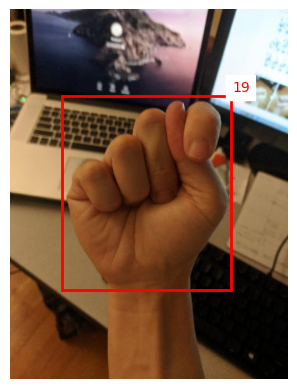

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

set_type = "test"

folder = f"American-Sign-Language-Letters-1/{set_type}"

images_path = os.path.join(folder, "images")
labels_path = os.path.join(folder, "labels")
images = os.listdir(images_path)
labels = os.listdir(labels_path)



def plot_image_with_bounding_box(image_path, label_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read the label file
    with open(label_path, 'r') as f:
        lines = f.readlines()

    # Plot the image
    plt.imshow(image)
    plt.axis('off')

    # Draw bounding boxes
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.split())
        x_center *= image.shape[1]
        y_center *= image.shape[0]
        width *= image.shape[1]
        height *= image.shape[0]

        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Draw the rectangle
        plt.gca().add_patch(plt.Rectangle((x1, y1), width, height, edgecolor='red', facecolor='none', linewidth=2))

        # Display class_id at the top-right corner outside the bounding box
        plt.text(x2 + 2, y1 - 2, str(int(class_id)), color='red', fontsize=10,
                 verticalalignment='bottom', horizontalalignment='left', backgroundcolor='white')

    plt.show()


# Randomly select an image and its corresponding label
random_index = random.randint(0, len(images) - 1)
image_name = images[random_index]
image_path = os.path.join(images_path, image_name)

label_name = image_name.replace('.jpg', '.txt')
label_path = os.path.join(labels_path, label_name)

# Plot the image with bounding box
plot_image_with_bounding_box(image_path, label_path)

In [ ]:
from ultralytics import YOLO

model = YOLO(model="train/weights/best.pt")  # load a custom model


In [79]:

random_example = random.choice(images)
image_path = os.path.join(images_path, random_example)

result = model(image_path)

for r in result:
    boxes = r.boxes
    masks = r.masks
    probs = r.probs

    # Print results
    print(f"Image: {image_path}")
    print(f"Boxes: {boxes}")
    print(f"Masks: {masks}")
    print(f"Probs: {probs}")



image 1/1 /home/jan/projects_local/yolo/American-Sign-Language-Letters-1/test/images/M14_jpg.rf.0f7c18e802eacb187ddffb2c73ee8683.jpg: 640x480 1 T, 76.0ms
Speed: 1.3ms preprocess, 76.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Image: American-Sign-Language-Letters-1/test/images/M14_jpg.rf.0f7c18e802eacb187ddffb2c73ee8683.jpg
Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([19.])
conf: tensor([0.6882])
data: tensor([[102.2944, 104.3203, 374.6274, 414.4301,   0.6882,  19.0000]])
id: None
is_track: False
orig_shape: (640, 480)
shape: torch.Size([1, 6])
xywh: tensor([[238.4609, 259.3752, 272.3330, 310.1099]])
xywhn: tensor([[0.4968, 0.4053, 0.5674, 0.4845]])
xyxy: tensor([[102.2944, 104.3203, 374.6274, 414.4301]])
xyxyn: tensor([[0.2131, 0.1630, 0.7805, 0.6475]])
Masks: None
Probs: None


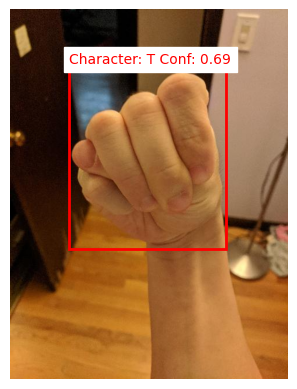

In [80]:
alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 
            "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
            "U", "V", "W", "X", "Y", "Z"]



# Display the image with bounding boxes
def display_image_with_bounding_boxes(image_path, results):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis('off')

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates
        confidences = result.boxes.conf.cpu().numpy()  # Get confidence scores
        class_ids = result.boxes.cls.cpu().numpy()  # Get class IDs

        for box, conf, class_id in zip(boxes, confidences, class_ids):
            x1, y1, x2, y2 = box.astype(int)
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                               edgecolor='red', facecolor='none', linewidth=2))
            plt.text(x1, y1 - 5, f'Character: {alphabet[int(class_id)]} Conf: {conf:.2f}', color='red', fontsize=10,
                     verticalalignment='bottom', horizontalalignment='left', backgroundcolor='white')

    plt.show()

# Display the image with bounding boxes
display_image_with_bounding_boxes(image_path, result)